In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer Dataset
data = load_breast_cancer(as_frame=True)
df = data.frame

# Features (X) and target (y)
X = df.drop("target", axis=1)  # Drop the target column
y = df["target"]  # Target column

# Display dataset information
print("Dataset Shape:", df.shape)
print("Feature Names:", data.feature_names)
df.head()

Dataset Shape: (569, 31)
Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Missing Values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


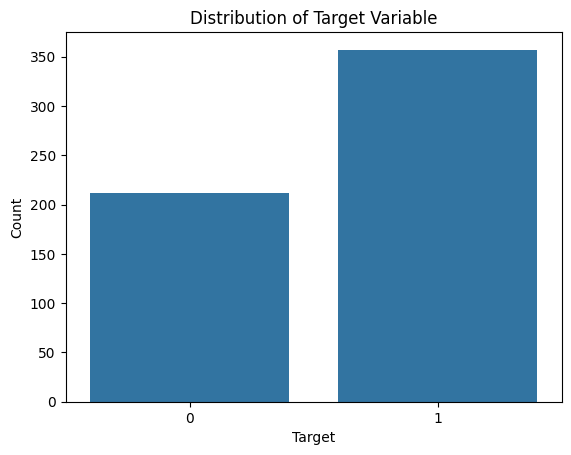

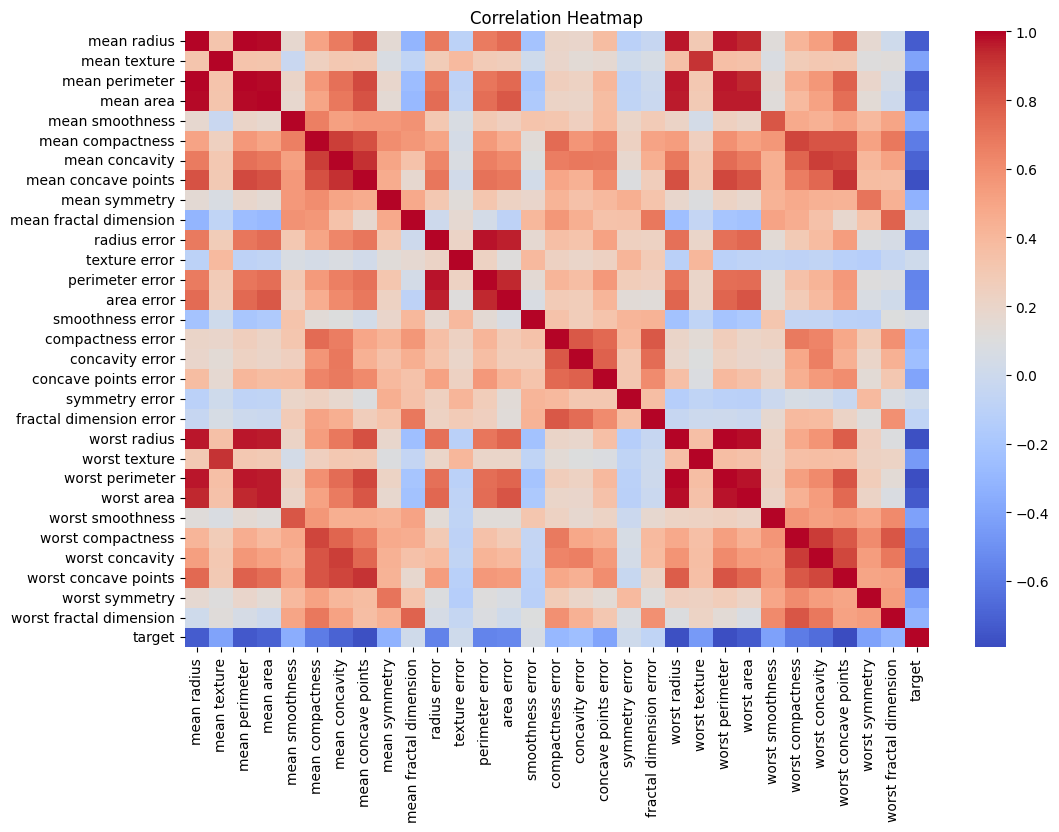

In [5]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Visualize the distribution of the target variable
sns.countplot(x=y)
plt.title("Distribution of Target Variable")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/home/astane/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [8]:
# Predict on the test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.96
Confusion Matrix:
 [[39  4]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



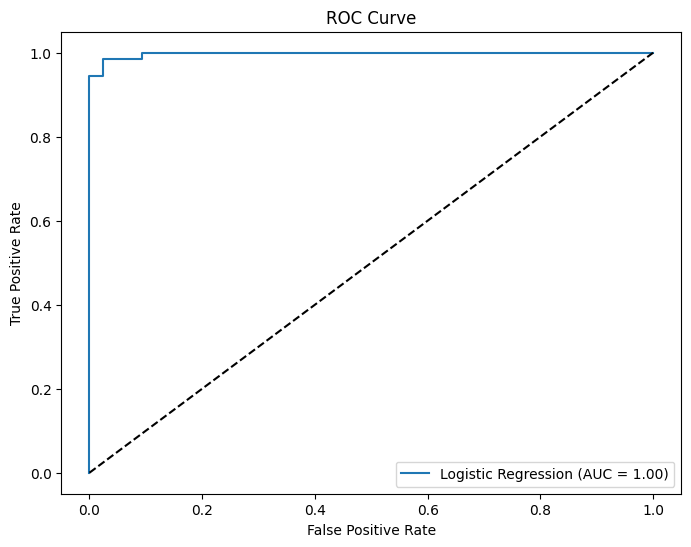

In [9]:
# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

                    Feature  Coefficient
0               mean radius     2.347674
11            texture error     1.585760
20             worst radius     0.795865
1              mean texture     0.188614
15        compactness error     0.104478
16          concavity error     0.039430
19  fractal dimension error     0.022229
3                 mean area    -0.003395
23               worst area    -0.022032
9    mean fractal dimension    -0.025476
14         smoothness error    -0.030550
22          worst perimeter    -0.030762
18           symmetry error    -0.047110
17     concave points error    -0.050999
13               area error    -0.077322
29  worst fractal dimension    -0.102636
10             radius error    -0.124512
2            mean perimeter    -0.160765
4           mean smoothness    -0.216828
8             mean symmetry    -0.293597
12          perimeter error    -0.314989
24         worst smoothness    -0.410095
5          mean compactness    -0.424585
21            wo

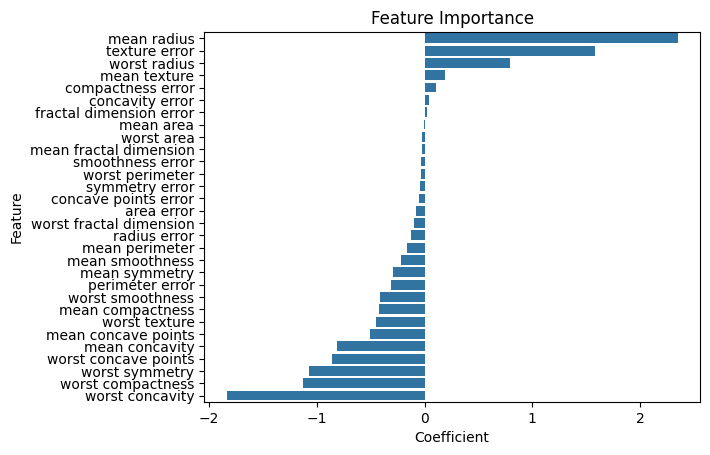

In [10]:
# Feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(feature_importance)

# Visualize feature importance
sns.barplot(x="Coefficient", y="Feature", data=feature_importance)
plt.title("Feature Importance")
plt.show()

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Define the Logistic Regression model
class LogisticRegressionTorch(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Initialize the model
input_dim = X_train.shape[1]
torch_model = LogisticRegressionTorch(input_dim)

# Initialize weights
def initialize_weights(model):
    if isinstance(model, nn.Linear):
        nn.init.xavier_uniform_(model.weight)
        nn.init.zeros_(model.bias)

torch_model.apply(initialize_weights)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(torch_model.parameters(), lr=0.001)

# Train the model
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = torch_model(X_train_tensor)
    
    # Compute loss
    loss = criterion(y_pred, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

# Evaluate the model
with torch.no_grad():
    y_pred_prob = torch_model(X_test_tensor)
    y_pred_class = (y_pred_prob >= 0.5).float()

# Convert predictions to numpy for comparison
y_pred_class_np = y_pred_class.numpy()

# Calculate metrics
torch_accuracy = accuracy_score(y_test, y_pred_class_np)
torch_conf_matrix = confusion_matrix(y_test, y_pred_class_np)
torch_class_report = classification_report(y_test, y_pred_class_np)
torch_roc_auc = roc_auc_score(y_test, y_pred_prob.numpy())

print(f"PyTorch Logistic Regression - Accuracy: {torch_accuracy:.2f}")
print("Confusion Matrix:\n", torch_conf_matrix)
print("Classification Report:\n", torch_class_report)
print(f"ROC AUC Score: {torch_roc_auc:.2f}")

Epoch 100/1000, Loss: 0.3506
Epoch 200/1000, Loss: 0.2493
Epoch 300/1000, Loss: 0.1999
Epoch 400/1000, Loss: 0.1697
Epoch 500/1000, Loss: 0.1494
Epoch 600/1000, Loss: 0.1349
Epoch 700/1000, Loss: 0.1240
Epoch 800/1000, Loss: 0.1155
Epoch 900/1000, Loss: 0.1087
Epoch 1000/1000, Loss: 0.1030
PyTorch Logistic Regression - Accuracy: 0.98
Confusion Matrix:
 [[42  1]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

ROC AUC Score: 1.00


Model Comparison:
Scikit-learn Logistic Regression - Accuracy: 0.96, ROC AUC: 1.00
PyTorch Logistic Regression - Accuracy: 0.98, ROC AUC: 1.00


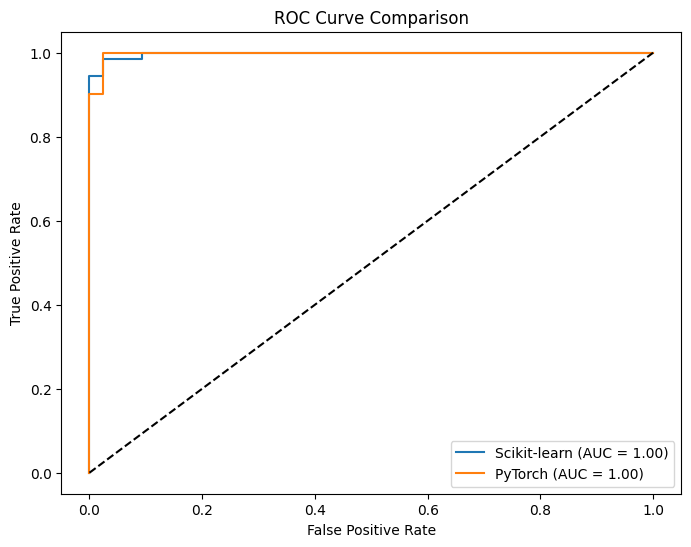

In [14]:
# Compare metrics
print("Model Comparison:")
print(f"Scikit-learn Logistic Regression - Accuracy: {accuracy:.2f}, ROC AUC: {roc_auc:.2f}")
print(f"PyTorch Logistic Regression - Accuracy: {torch_accuracy:.2f}, ROC AUC: {torch_roc_auc:.2f}")

# Visualize ROC curves for both models
from sklearn.metrics import roc_curve

# Scikit-learn ROC curve
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, y_prob)

# PyTorch ROC curve
fpr_torch, tpr_torch, _ = roc_curve(y_test, y_pred_prob.numpy())

plt.figure(figsize=(8, 6))
plt.plot(fpr_sklearn, tpr_sklearn, label=f"Scikit-learn (AUC = {roc_auc:.2f})")
plt.plot(fpr_torch, tpr_torch, label=f"PyTorch (AUC = {torch_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()